RSI = 100 - 100 / (1 + RS)

Where RS = Average gain of up periods during the specified time frame / Average loss of down periods during the specified time frame

If RSI > 70, sell signal
If RSI < 30, buy signal

### Import CSV

In [24]:
import pandas as pd
import datetime
import numpy as np

df = pd.read_csv('S&P 500 Futures Historical Data_20 years.csv')

# remove the calculated columns
df1 = df[['Date', 'Price', 'Open', 'High', 'Low']]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Date     5000 non-null object
Price    5000 non-null float64
Open     5000 non-null float64
High     5000 non-null float64
Low      5000 non-null float64
dtypes: float64(4), object(1)
memory usage: 195.4+ KB


In [25]:
# reverse and reset index
df1 = df1.reindex(index=df1.index[::-1])
df1 = df1.set_index('Date')

# calculate difference of day prices
df1['Diff'] = df1['Price'].diff()
# len(np.diff(df1['Price']))

df1.head()

Price     Open     High      Low  Diff
Date                                              
9-Nov-98   1136.5  1146.50  1149.25  1127.50   NaN
10-Nov-98  1129.0  1136.25  1140.50  1128.00  -7.5
11-Nov-98  1126.2  1130.25  1142.00  1121.25  -2.8
12-Nov-98  1123.8  1126.00  1132.00  1118.25  -2.4
13-Nov-98  1133.3  1123.50  1134.00  1121.00   9.5

### Plot the differences

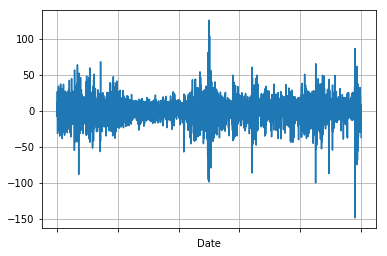

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
df1['Diff'].plot(grid=True)
plt.show()

# Calculate RSI

In [31]:
# separating up and down values
df1['Upvals'] = np.where(df1['Diff'] > 0, df1['Diff'], 0)
df1['Downvals'] = np.where(df1['Diff'] < 0, df1['Diff'], 0)
df1.head()

Price     Open     High      Low  Diff  Upvals  Downvals
Date                                                                
9-Nov-98   1136.5  1146.50  1149.25  1127.50   NaN     0.0       0.0
10-Nov-98  1129.0  1136.25  1140.50  1128.00  -7.5     0.0      -7.5
11-Nov-98  1126.2  1130.25  1142.00  1121.25  -2.8     0.0      -2.8
12-Nov-98  1123.8  1126.00  1132.00  1118.25  -2.4     0.0      -2.4
13-Nov-98  1133.3  1123.50  1134.00  1121.00   9.5     9.5       0.0

In [33]:
# calculate sum of all up or down values divided by length of window
df1['Up'] = df1['Upvals'].rolling(window=20).sum()/20
df1['Down'] = df1['Downvals'].rolling(window=20).sum()/20

df1[20:].head()

Price     Open    High      Low  Diff  Upvals  Downvals     Up  \
Date                                                                         
8-Dec-98   1181.5  1187.25  1195.5  1173.25  -6.0     0.0      -6.0  6.230   
9-Dec-98   1184.5  1182.00  1187.5  1176.50   3.0     3.0       0.0  6.380   
10-Dec-98  1166.4  1185.00  1189.5  1163.75 -18.1     0.0     -18.1  6.380   
11-Dec-98  1163.4  1165.50  1169.5  1154.00  -3.0     0.0      -3.0  6.380   
14-Dec-98  1136.5  1161.00  1161.0  1135.50 -26.9     0.0     -26.9  5.905   

            Down  
Date              
8-Dec-98  -3.980  
9-Dec-98  -3.605  
10-Dec-98 -4.370  
11-Dec-98 -4.400  
14-Dec-98 -5.745

In [34]:
# relative strength index
df1['RS'] = df1['Up'] / -df1['Down']
df1[20:].head()

Price     Open    High      Low  Diff  Upvals  Downvals     Up  \
Date                                                                         
8-Dec-98   1181.5  1187.25  1195.5  1173.25  -6.0     0.0      -6.0  6.230   
9-Dec-98   1184.5  1182.00  1187.5  1176.50   3.0     3.0       0.0  6.380   
10-Dec-98  1166.4  1185.00  1189.5  1163.75 -18.1     0.0     -18.1  6.380   
11-Dec-98  1163.4  1165.50  1169.5  1154.00  -3.0     0.0      -3.0  6.380   
14-Dec-98  1136.5  1161.00  1161.0  1135.50 -26.9     0.0     -26.9  5.905   

            Down        RS  
Date                        
8-Dec-98  -3.980  1.565327  
9-Dec-98  -3.605  1.769764  
10-Dec-98 -4.370  1.459954  
11-Dec-98 -4.400  1.450000  
14-Dec-98 -5.745  1.027850

In [35]:
# calculate RSI
df1['RSI'] = 100 - (100 / (1 + df1['RS']))
df1[20:].head()

Price     Open    High      Low  Diff  Upvals  Downvals     Up  \
Date                                                                         
8-Dec-98   1181.5  1187.25  1195.5  1173.25  -6.0     0.0      -6.0  6.230   
9-Dec-98   1184.5  1182.00  1187.5  1176.50   3.0     3.0       0.0  6.380   
10-Dec-98  1166.4  1185.00  1189.5  1163.75 -18.1     0.0     -18.1  6.380   
11-Dec-98  1163.4  1165.50  1169.5  1154.00  -3.0     0.0      -3.0  6.380   
14-Dec-98  1136.5  1161.00  1161.0  1135.50 -26.9     0.0     -26.9  5.905   

            Down        RS        RSI  
Date                                   
8-Dec-98  -3.980  1.565327  61.018609  
9-Dec-98  -3.605  1.769764  63.895844  
10-Dec-98 -4.370  1.459954  59.348837  
11-Dec-98 -4.400  1.450000  59.183673  
14-Dec-98 -5.745  1.027850  50.686695

### Plot RSI

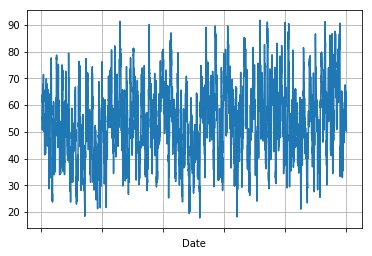

In [36]:
df1['RSI'].plot(grid=True)
# add top and bottom bands to plot

plt.show()

### Send RSI signals

In [37]:
# Sell if over high threshold / Buy if under low threshold
# thrsholds can be set by user input later
RSI_top = 70
RSI_bottom = 30

df1['RSI_Sell'] = np.where(df1['RSI']>RSI_top,1,0)
df1['RSI_Buy'] = np.where(df1['RSI']<RSI_bottom,1,0)

In [41]:
df1[20:]

Price     Open     High      Low   Diff  Upvals  Downvals  \
Date                                                                     
8-Dec-98   1181.50  1187.25  1195.50  1173.25  -6.00    0.00     -6.00   
9-Dec-98   1184.50  1182.00  1187.50  1176.50   3.00    3.00      0.00   
10-Dec-98  1166.40  1185.00  1189.50  1163.75 -18.10    0.00    -18.10   
11-Dec-98  1163.40  1165.50  1169.50  1154.00  -3.00    0.00     -3.00   
14-Dec-98  1136.50  1161.00  1161.00  1135.50 -26.90    0.00    -26.90   
15-Dec-98  1162.80  1137.50  1164.00  1137.00  26.30   26.30      0.00   
16-Dec-98  1162.70  1163.25  1168.75  1138.00  -0.10    0.00     -0.10   
17-Dec-98  1180.10  1165.25  1183.00  1140.00  17.40   17.40      0.00   
18-Dec-98  1180.28  1181.50  1182.50  1177.00   0.18    0.18      0.00   
21-Dec-98  1214.50  1195.50  1225.25  1191.50  34.22   34.22      0.00   
22-Dec-98  1216.00  1214.25  1223.00  1203.50   1.50    1.50      0.00   
23-Dec-98  1242.60  1214.50  1243.50  1212.00  26.60   26.60      0.00   
24-Dec-98  1239.50  1241.50  1242.75  1237.00  -3.10    0.00     -3.10   
28-Dec-98  1233.50  1237.75  1249.00  1231.50  -6.00    0.00     -6.00   
29-Dec-98  1254.60  1233.75  1255.25  1231.50  21.10   21.10      0.00   
30-Dec-98  1242.10  1254.50  1256.75  1240.75 -12.50    0.00    -12.50   
31-Dec-98  1245.50  1242.00  1249.00  1234.25   3.40    3.40      0.00   
4-Jan-99   1240.90  1243.25  1261.00  1226.50  -4.60    0.00     -4.60   
5-Jan-99   1253.20  1240.00  1258.00  1236.00  12.30   12.30      0.00   
6-Jan-99   1280.20  1253.00  1285.50  1252.00  27.00   27.00      0.00   
7-Jan-99   1277.80  1281.00  1281.50  1266.25  -2.40    0.00     -2.40   
8-Jan-99   1287.00  1277.50  1291.00  1271.25   9.20    9.20      0.00   
11-Jan-99  1274.00  1286.00  1294.25  1261.25 -13.00    0.00    -13.00   
12-Jan-99  1251.10  1273.75  1277.50  1244.75 -22.90    0.00    -22.90   
13-Jan-99  1239.00  1251.50  1257.50  1210.00 -12.10    0.00    -12.10   
14-Jan-99  1219.00  1239.25  1252.25  1215.50 -20.00    0.00    -20.00   
15-Jan-99  1248.60  1219.00  1249.75  1203.50  29.60   29.60      0.00   
19-Jan-99  1257.00  1248.00  1262.00  1241.00   8.40    8.40      0.00   
20-Jan-99  1268.20  1261.50  1283.75  1257.25  11.20   11.20      0.00   
21-Jan-99  1233.00  1267.50  1270.75  1231.50 -35.20    0.00    -35.20   
...            ...      ...      ...      ...    ...     ...       ...   
16-May-18  2723.00  2711.25  2728.00  2704.50  14.00   14.00      0.00   
17-May-18  2718.75  2721.75  2732.00  2711.00  -4.25    0.00     -4.25   
18-May-18  2713.00  2718.75  2727.00  2708.75  -5.75    0.00     -5.75   
21-May-18  2733.00  2728.75  2739.25  2724.25  20.00   20.00      0.00   
22-May-18  2726.00  2731.25  2741.75  2721.50  -7.00    0.00     -7.00   
23-May-18  2730.75  2724.50  2733.00  2704.50   4.75    4.75      0.00   
24-May-18  2727.50  2729.75  2733.25  2705.75  -3.25    0.00     -3.25   
25-May-18  2718.25  2726.75  2737.75  2713.75  -9.25    0.00     -9.25   
27-May-18  2729.50  2731.00  2731.00  2726.00  11.25   11.25      0.00   
28-May-18  2722.00  2729.50  2731.75  2718.25  -7.50    0.00     -7.50   
29-May-18  2692.25  2729.00  2731.75  2675.00 -29.75    0.00    -29.75   
30-May-18  2724.50  2693.25  2729.25  2685.75  32.25   32.25      0.00   
31-May-18  2705.50  2720.25  2728.25  2699.75 -19.00    0.00    -19.00   
1-Jun-18   2733.75  2707.50  2737.00  2706.00  28.25   28.25      0.00   
4-Jun-18   2745.50  2731.00  2749.25  2729.00  11.75   11.75      0.00   
5-Jun-18   2751.50  2746.00  2753.25  2739.00   6.00    6.00      0.00   
6-Jun-18   2772.25  2751.00  2774.75  2748.00  20.75   20.75      0.00   
7-Jun-18   2772.25  2773.25  2779.75  2760.00   0.00    0.00      0.00   
8-Jun-18   2778.75  2771.00  2779.75  2752.00   6.50    6.50      0.00   
11-Jun-18  2783.00  2771.00  2790.50  2770.50   4.25    4.25      0.00   
12-Jun-18  2784.00  2781.25  2789.75  2778.50   1.00    1.00      0.00   
13-Jun-18  2774.2